In [1]:
#importando librerias necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

#importando datos
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Proyecto DSCH/gun_violence'
gun_violence = pd.read_csv('gun_violence_data.csv')

Mounted at /content/gdrive
/content/gdrive/MyDrive/Proyecto DSCH/gun_violence


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
#eliminación de valore extremos
gun_violence = gun_violence.drop(gun_violence[gun_violence.n_guns_involved >= 10].index)
gun_violence = gun_violence.drop(gun_violence[gun_violence.n_injured >= 20].index)


In [3]:
#factorizado de la columna estado y dropeo de columnas innecesarias
gun_violence['state_n'] = pd.factorize(gun_violence['state'])[0] + 1
gun_violence = gun_violence.drop(['incident_id', 'congressional_district', 'gun_stolen', 'state_house_district', 'city_or_county', 'state_senate_district'], axis=1)

In [4]:
gun_violence.head()

,date,state,n_killed,n_injured,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_n
0,2014-01-01,Kentucky,0,1,NaN,Shot - Wounded/Injured,38.0507,-84.4829,NaN,NaN,0::Adult 18+,0::Male,0::Injured,0::Victim,1
1,2014-01-01,Kentucky,0,1,0::Unknown,Shot - Wounded/Injured||Accidental Shooting||A...,38.4333,-84.3542,1.0,1::22,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,1
2,2014-01-01,Kentucky,0,1,NaN,Shot - Wounded/Injured,38.2501,-85.8150,NaN,NaN,0::Adult 18+,0::Male,0::Injured,0::Victim,1
3,2014-01-01,Oklahoma,0,0,NaN,Shots Fired - No Injuries,34.6347,-98.4222,NaN,NaN,0::Adult 18+,0::Male||1::Male,0::Unharmed||1::Unharmed,0::Victim||1::Subject-Suspect,2
4,2014-01-01,New York,0,1,NaN,Pistol-whipping,40.8179,-73.8628,NaN,0::23,0::Adult 18+,0::Male,0::Injured,0::Victim,3


In [5]:
#split de columnas

gun_violence['participant_age'].str.split('[:,||]', expand=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/strings/object_array.py:320: FutureWarning: Possible set union at position 3
  regex = re.compile(pat)


,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,,22,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,,23,None,None,None,None,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184306,1,,18,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
184307,0,,23,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
184308,1,,48,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
184309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,None,None,None,None,None,None,None,None,None,None


In [6]:
#dropeo de registros vacíos en cantidad de armas involucradas
gun_violence_2=gun_violence.dropna(subset=['n_guns_involved'])
gun_violence_2.head()

,date,state,n_killed,n_injured,gun_type,incident_characteristics,latitude,longitude,n_guns_involved,participant_age,participant_age_group,participant_gender,participant_status,participant_type,state_n
1,2014-01-01,Kentucky,0,1,0::Unknown,Shot - Wounded/Injured||Accidental Shooting||A...,38.4333,-84.3542,1.0,1::22,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,1
6,2014-01-01,New York,1,0,0::Unknown,"Shot - Dead (murder, accidental, suicide)||Gan...",40.6838,-73.9075,1.0,0::17,0::Teen 12-17,0::Male,0::Killed,0::Victim,3
12,2014-01-01,West Virginia,0,1,0::Unknown,Shot - Wounded/Injured,38.3560,-81.6440,1.0,0::23||1::30,0::Adult 18+||1::Adult 18+,0::Male||1::Male,"0::Injured||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,4
110,2014-01-01,Alabama,0,2,0::Unknown,Shot - Wounded/Injured||Accidental Shooting||A...,34.6937,-86.6275,1.0,0::17,0::Teen 12-17||1::Adult 18+,0::Male||1::Male,0::Injured||1::Injured,0::Victim||1::Victim||2::Subject-Suspect,13
126,2014-01-02,Florida,0,1,0::Unknown,Shot - Wounded/Injured||Accidental Shooting||A...,28.3552,-80.6626,1.0,0::14,0::Teen 12-17,0::Female,0::Injured,0::Victim,32


In [7]:
gun_violence_2.describe()

,n_killed,n_injured,latitude,longitude,n_guns_involved,state_n
count,105494.000000,105494.000000,105494.000000,105494.000000,105494.000000,105494.000000
mean,0.295894,0.495981,37.879536,-89.790590,1.152246,19.130519
std,0.554352,0.720436,5.150534,14.799802,0.638457,12.808615
min,0.000000,0.000000,19.112700,-166.097000,1.000000,1.000000
25%,0.000000,0.000000,34.105750,-94.513275,1.000000,8.000000
50%,0.000000,0.000000,38.930750,-86.742100,1.000000,16.000000
75%,1.000000,1.000000,41.644075,-80.123825,1.000000,31.000000
max,17.000000,19.000000,71.336800,-67.271100,9.000000,51.000000


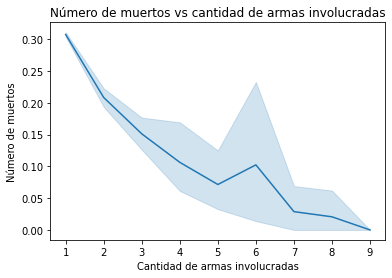

In [8]:
#relacion entre cantidad de muertos y cantidad de armas involucradas
sns.lineplot(data=gun_violence_2, y='n_killed', x='n_guns_involved')
plt.title('Número de muertos vs cantidad de armas involucradas')
plt.ylabel('Número de muertos')
plt.xlabel('Cantidad de armas involucradas')
plt.show()

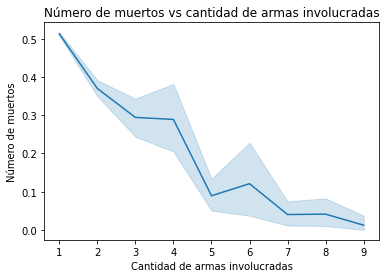

In [9]:
#relacion entre cantidad de heridos y cantidad de armas involucradas
sns.lineplot(data=gun_violence_2, y='n_injured', x='n_guns_involved')
plt.title('Número de muertos vs cantidad de armas involucradas')
plt.ylabel('Número de muertos')
plt.xlabel('Cantidad de armas involucradas')
plt.show()

Text(0.5, 1.0, 'Cantidad de muertes por estado')

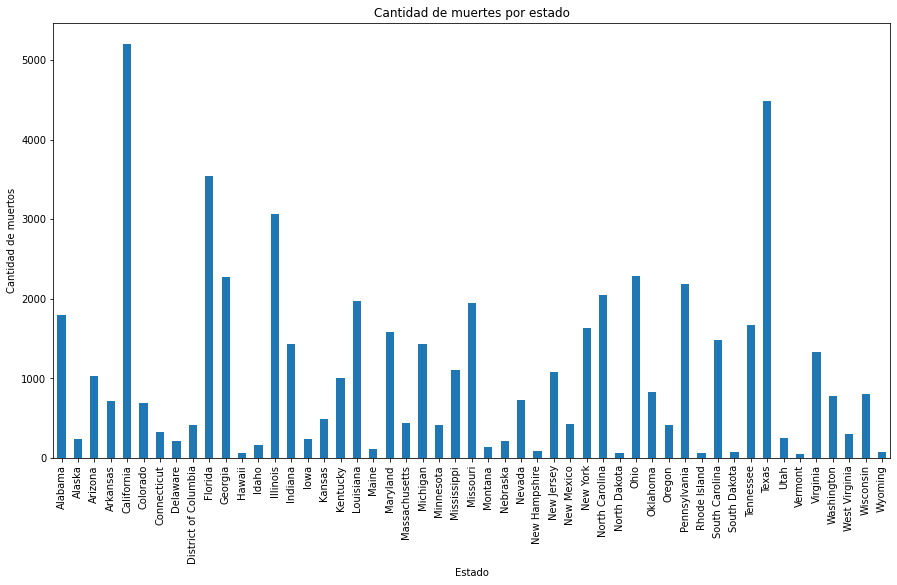

In [10]:
fig, ax = plt.subplots(figsize=(15, 8))
agg_gun = gun_violence.groupby(['state']).sum()
agg_gun['n_killed'].plot.bar()
plt.xlabel('Estado')
plt.ylabel('Cantidad de muertos')
plt.title('Cantidad de muertes por estado')

Text(0.5, 1.0, 'Cantidad de heridos por estado')

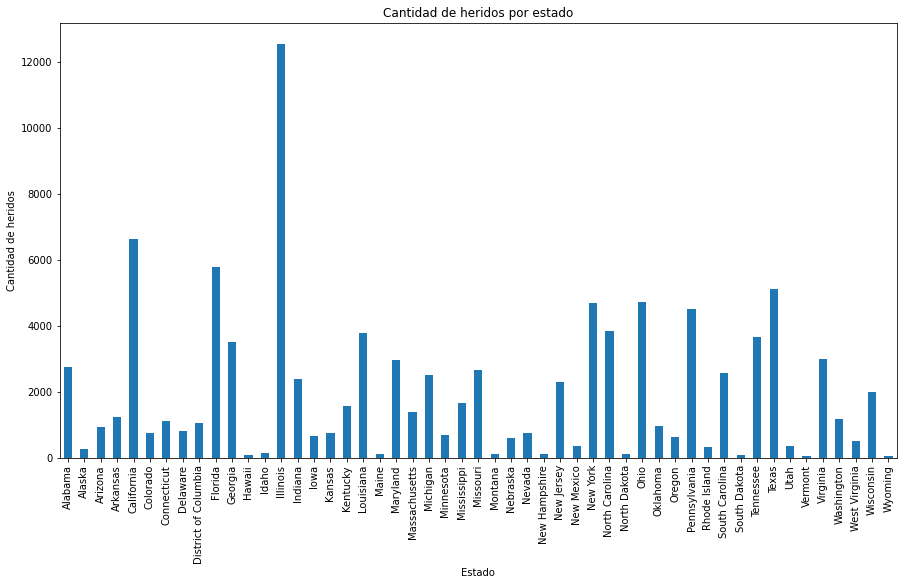

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
agg_gun = gun_violence.groupby(['state']).sum()
agg_gun['n_injured'].plot.bar()
plt.xlabel('Estado')
plt.ylabel('Cantidad de heridos')
plt.title('Cantidad de heridos por estado')

#Análisis Armas vs Muertos.

Estudio de la relación entre la cantidad de armas involucradas y la cantidad de muertos en el episodio

In [16]:
guns_killed = gun_violence_2.drop(['date','state','n_injured','gun_type','incident_characteristics','latitude','longitude','participant_age','participant_age_group',
                                   'participant_gender','participant_status','participant_type','state_n'], axis=1)
guns_killed.head()

,n_killed,n_guns_involved
1,0,1.0
6,1,1.0
12,0,1.0
110,0,1.0
126,0,1.0


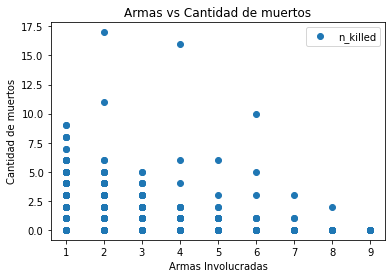

In [24]:
guns_killed.plot(x='n_guns_involved', y='n_killed', style="o")
plt.title('Armas vs Cantidad de muertos')
plt.xlabel('Armas Involucradas')
plt.ylabel('Cantidad de muertos')
plt.show()

In [25]:
# Correlación lineal entre las dos variables

from scipy.stats import pearsonr

corr_test = pearsonr(x=guns_killed['n_guns_involved'], y=guns_killed['n_killed'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.06811844844009854
P-value:  1.0378627336382024e-108


#Análisis Armas vs Heridos.

Estudio de la relación entre la cantidad de armas involucradas y la cantidad de heridos en el episodio

In [17]:
guns_injured = gun_violence_2.drop(['date','state','n_killed','gun_type','incident_characteristics','latitude','longitude','participant_age','participant_age_group',
                                   'participant_gender','participant_status','participant_type','state_n'], axis=1)
guns_injured.head()

,n_injured,n_guns_involved
1,1,1.0
6,0,1.0
12,1,1.0
110,2,1.0
126,1,1.0


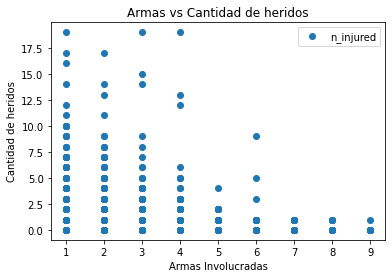

In [26]:
#ploteamos el dataset
guns_injured.plot(x='n_guns_involved', y='n_injured', style="o")
plt.title('Armas vs Cantidad de heridos')
plt.xlabel('Armas Involucradas')
plt.ylabel('Cantidad de heridos')
plt.show()

In [27]:
# Correlación lineal entre las dos variables

from scipy.stats import pearsonr

corr_test = pearsonr(x=guns_injured['n_guns_involved'], y=guns_injured['n_injured'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  -0.07985746405089839
P-value:  8.606597295884461e-149


In [18]:
state_injured = gun_violence_2.drop(['date','state','n_killed','gun_type','incident_characteristics','latitude','longitude','participant_age','participant_age_group',
                                   'participant_gender','participant_status','participant_type','n_guns_involved'], axis=1)
state_injured.head()

,n_injured,state_n
1,1,1
6,0,3
12,1,4
110,2,13
126,1,32


In [19]:
state_killed = gun_violence_2.drop(['date','state','n_injured','gun_type','incident_characteristics','latitude','longitude','participant_age','participant_age_group',
                                   'participant_gender','participant_status','participant_type','n_guns_involved'], axis=1)
state_killed.head()

,n_killed,state_n
1,0,1
6,1,3
12,0,4
110,0,13
126,0,32
